In [1]:
from trajectory import Trajectory

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import numpy as np

traj = Trajectory()
traj.z


[[ 0.40004251  0.38739936  0.37475247 ...  0.4758369   0.43794173
   0.40004259]
 [ 5.02706154  5.02904079  5.03100414 ... 15.07692441 15.07907832
  15.08118461]
 [ 0.80008001  0.80008001  0.80008001 ...  0.80008001  0.80008001
   0.80008001]]
[[ 0.40004251  0.38739936  0.37475247 ...  0.4758369   0.43794173
   0.40004259]
 [ 5.02706154  5.02904079  5.03100414 ... 15.07692441 15.07907832
  15.08118461]
 [ 0.80008001  0.80008001  0.80008001 ...  0.80008001  0.80008001
   0.80008001]]


array([0.00000000e+00, 8.00080008e-04, 1.60016002e-03, ...,
       7.99839984e+00, 7.99919992e+00, 8.00000000e+00])

In [7]:
rot = traj.rot_mat # 10000,3,3
loc_w = traj.imu_angular_velocity_l # 3,10000
loc_a = traj.imu_linear_acceleration_l # 3,10000
est_x = np.zeros(10000)
est_y = np.zeros(10000)
est_z = np.zeros(10000)
est_roll = np.zeros(10000)
est_pitch = np.zeros(10000)
est_yaw = np.zeros(10000)

est_x[0] = 2
est_y[0] = 0
est_z[0] = 0
est_roll[0] = 0
est_pitch[0] = 0
est_yaw[0] = 0
traj.imu_angular_velocity_g

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30921514e-01,  1.30921514e-01,  1.30921514e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.86946513e+00,  4.44043151e+03,  4.44101303e+03],
       [ 2.51352548e+00,  2.51352548e+00,  2.51352548e+00, ...,
         1.68524492e+00, -4.44177953e+03, -4.44119818e+03]])

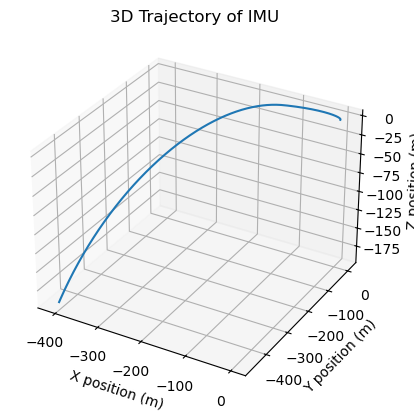

In [8]:
# Measurement
dt = .001
# Velocity initialization
vx, vy, vz = 0.40004251, 5.02706154, 0.80008001

# Loop through each time step
for i in range(1, 10000):
    # Determine index for rotation matrix (assuming 10 times less samples for rotation matrices)
    rot_idx = i // 10 if i < 10000 else -1

    # Angular velocities (converted to global)
    w = (loc_w[:, i])@(rot[rot_idx,:,:].T)
    est_roll[i] = est_roll[i-1] + w[0] * dt
    est_pitch[i] = est_pitch[i-1] + w[1] * dt
    est_yaw[i] = est_yaw[i-1] + w[2] * dt

    # Linear accelerations (converted to global, minus gravity effect assuming it is included)
    a = (loc_a[:, i] + np.array([0,0,9.81]))@(rot[rot_idx,:,:].T)

    # Update velocities
    vx += a[0] * dt
    vy += a[1] * dt
    vz += a[2] * dt
    # Update positions
    est_x[i] = est_x[i-1] + vx * dt + a[0]*dt**2/2
    est_y[i] = est_y[i-1] + vy * dt + a[1]*dt**2/2
    est_z[i] = est_z[i-1] + vz * dt + a[2]*dt**2/2

# Plotting the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(est_x, est_y, est_z)
ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.set_zlabel('Z position (m)')
plt.title('3D Trajectory of IMU')
plt.show()

In [4]:
est_roll,traj.roll

(array([ 0.        ,  0.        ,  0.        , ..., -3.93167858,
        -3.92315585, -3.9231844 ]),
 array([0.        , 0.        , 0.        , ..., 0.78513632, 0.78526724,
        0.78539816]))

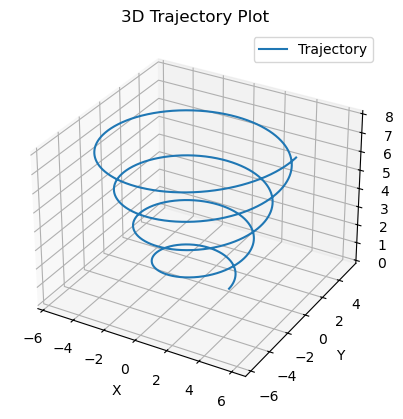

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(traj.x, traj.y, traj.z, label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory Plot')
ax.legend()

plt.show()

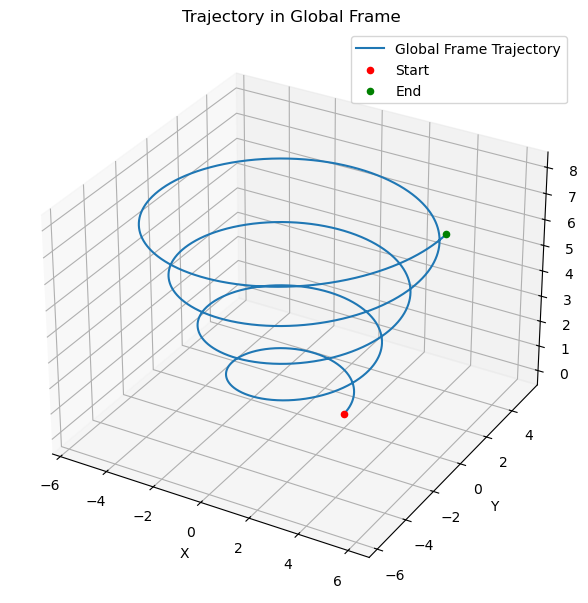

In [6]:
plt.ion()  # Turn on interactive mode
fig = plt.figure(figsize=(16, 8))

# Global frame plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(traj.x, traj.y, traj.z, label='Global Frame Trajectory')
ax1.scatter(traj.x[0], traj.y[0], traj.z[0], color='red', label='Start')
ax1.scatter(traj.x[-1], traj.y[-1], traj.z[-1], color='green', label='End')
ax1.set_title('Trajectory in Global Frame')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
plt.show()